# Imports

In [105]:
import networkx as nx
import dill as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import scipy.optimize as opt

# Reading the pickled graphs

In [106]:
# Read pickled graphs graph_objects/G_multi_directed.pickle, graph_objects/G_multi_undirected.pickle, graph_objects/G_simple_directed.pickle, graph_objects/G_simple_undirected.pickle
with open('graph_objects/G_multi_directed.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)

with open('graph_objects/G_multi_undirected.pickle', 'rb') as f:
    G_multi_undirected = pickle.load(f)

with open('graph_objects/G_simple_directed.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)

with open('graph_objects/G_simple_undirected.pickle', 'rb') as f:
    G_simple_undirected = pickle.load(f)

# Analysis

## Number of edges and nodes

In [107]:
# Print the number of nodes and edges in each graph in a human-readable format
print("G_multi_directed has", G_multi_directed.number_of_nodes(), "nodes and", G_multi_directed.number_of_edges(), "edges.")
print("G_multi_undirected has", G_multi_undirected.number_of_nodes(), "nodes and", G_multi_undirected.number_of_edges(), "edges.")
print("G_simple_directed has", G_simple_directed.number_of_nodes(), "nodes and", G_simple_directed.number_of_edges(), "edges.")
print("G_simple_undirected has", G_simple_undirected.number_of_nodes(), "nodes and", G_simple_undirected.number_of_edges(), "edges.")

G_multi_directed has 713 nodes and 1037 edges.
G_multi_undirected has 713 nodes and 980 edges.
G_simple_directed has 713 nodes and 873 edges.
G_simple_undirected has 713 nodes and 833 edges.


## Degree distribution

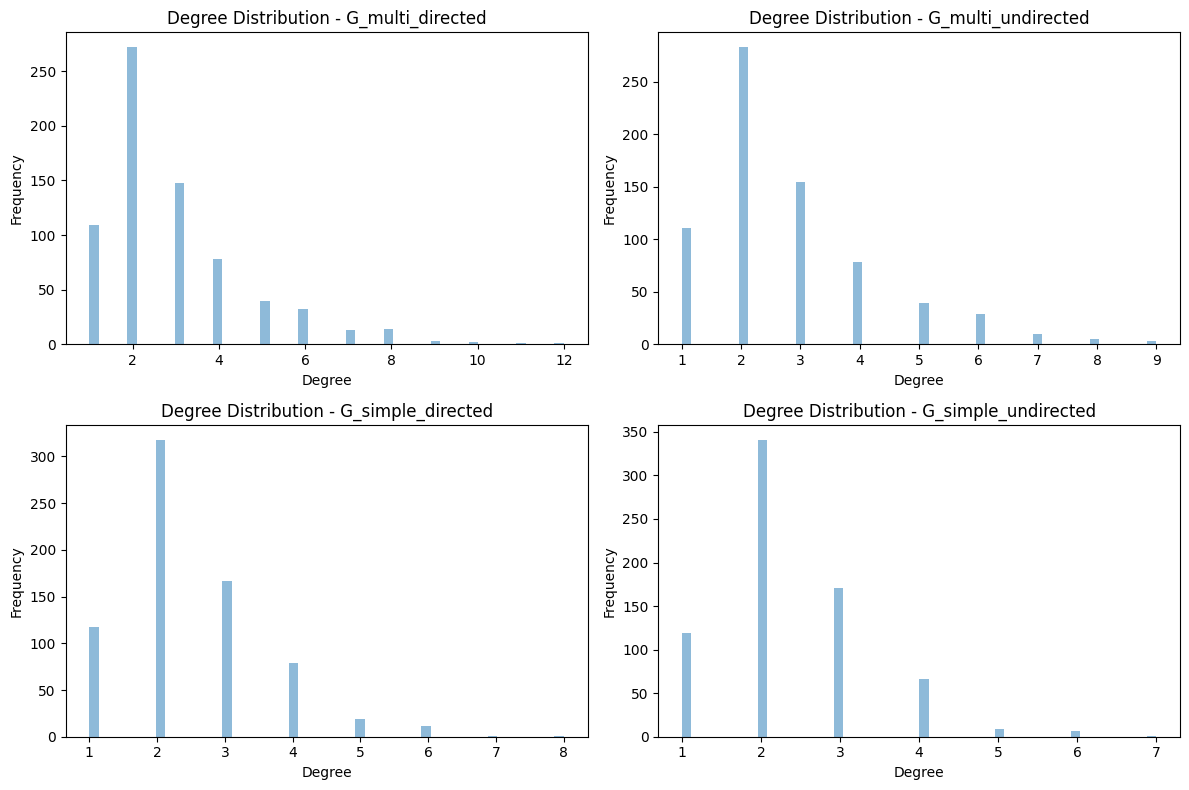

In [108]:
# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the degree distribution of G_multi_directed
axs[0, 0].hist(list(dict(G_multi_directed.degree()).values()), bins=50, alpha=0.5)
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Degree Distribution - G_multi_directed')

# Plot the degree distribution of G_multi_undirected
axs[0, 1].hist(list(dict(G_multi_undirected.degree()).values()), bins=50, alpha=0.5)
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Degree Distribution - G_multi_undirected')

# Plot the degree distribution of G_simple_directed
axs[1, 0].hist(list(dict(G_simple_directed.degree()).values()), bins=50, alpha=0.5)
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Degree Distribution - G_simple_directed')

# Plot the degree distribution of G_simple_undirected
axs[1, 1].hist(list(dict(G_simple_undirected.degree()).values()), bins=50, alpha=0.5)
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Degree Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Shortest path distribution

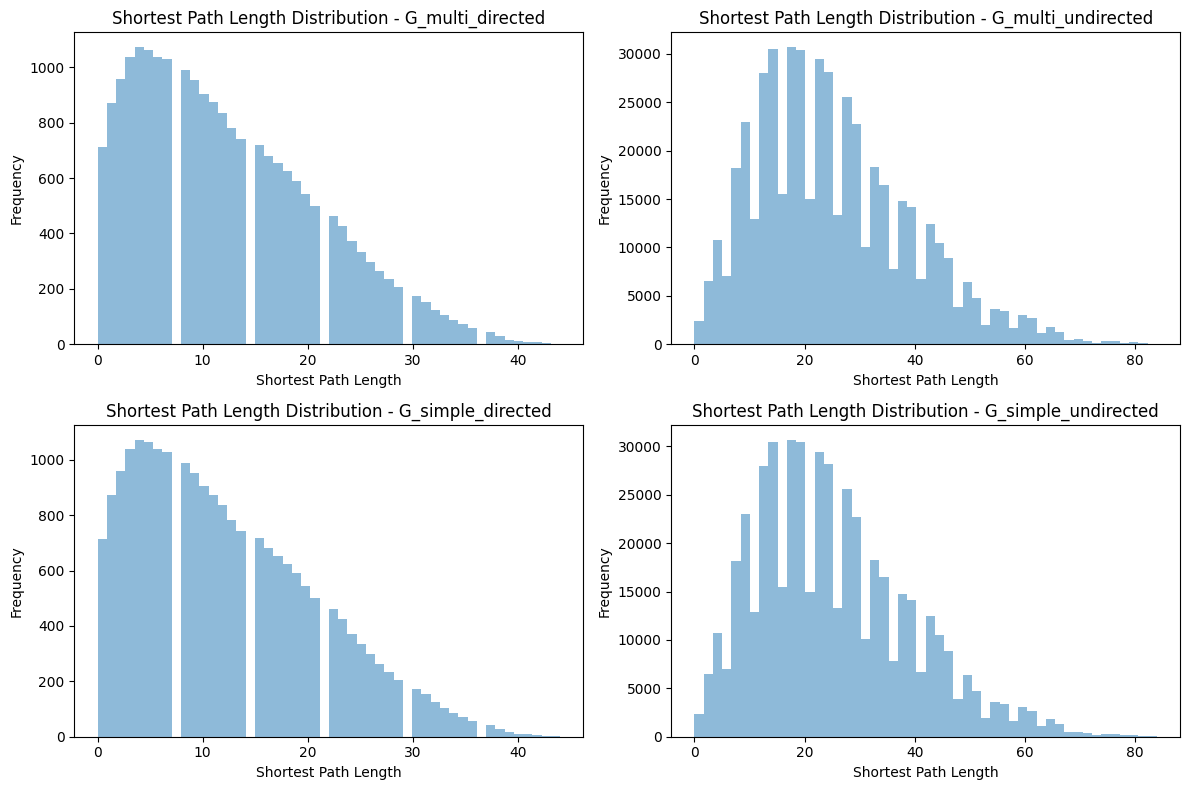

In [109]:
# Compute all pairs shortest path lengths for all graphs
G_multi_directed_shortest_path_lengths = dict(nx.shortest_path_length(G_multi_directed))
G_multi_undirected_shortest_path_lengths = dict(nx.shortest_path_length(G_multi_undirected))
G_simple_directed_shortest_path_lengths = dict(nx.shortest_path_length(G_simple_directed))
G_simple_undirected_shortest_path_lengths = dict(nx.shortest_path_length(G_simple_undirected))

# Flatten the dictionary to a list of lengths
G_multi_directed_shortest_path_lengths = [length for lengths in G_multi_directed_shortest_path_lengths.values() for length in lengths.values()]
G_multi_undirected_shortest_path_lengths = [length for lengths in G_multi_undirected_shortest_path_lengths.values() for length in lengths.values()]
G_simple_directed_shortest_path_lengths = [length for lengths in G_simple_directed_shortest_path_lengths.values() for length in lengths.values()]
G_simple_undirected_shortest_path_lengths = [length for lengths in G_simple_undirected_shortest_path_lengths.values() for length in lengths.values()]

# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(G_multi_directed_shortest_path_lengths, bins=50, alpha=0.5)
axs[0, 0].set_xlabel('Shortest Path Length')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Shortest Path Length Distribution - G_multi_directed')

axs[0, 1].hist(G_multi_undirected_shortest_path_lengths, bins=50, alpha=0.5)
axs[0, 1].set_xlabel('Shortest Path Length')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Shortest Path Length Distribution - G_multi_undirected')

axs[1, 0].hist(G_simple_directed_shortest_path_lengths, bins=50, alpha=0.5)
axs[1, 0].set_xlabel('Shortest Path Length')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Shortest Path Length Distribution - G_simple_directed')

axs[1, 1].hist(G_simple_undirected_shortest_path_lengths, bins=50, alpha=0.5)
axs[1, 1].set_xlabel('Shortest Path Length')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Shortest Path Length Distribution - G_simple_undirected')

plt.tight_layout()
plt.show()

# Ye et al. (2022): "Topology Analysis of Natural Gas Pipeline Networks Based on Complex Network Theory"

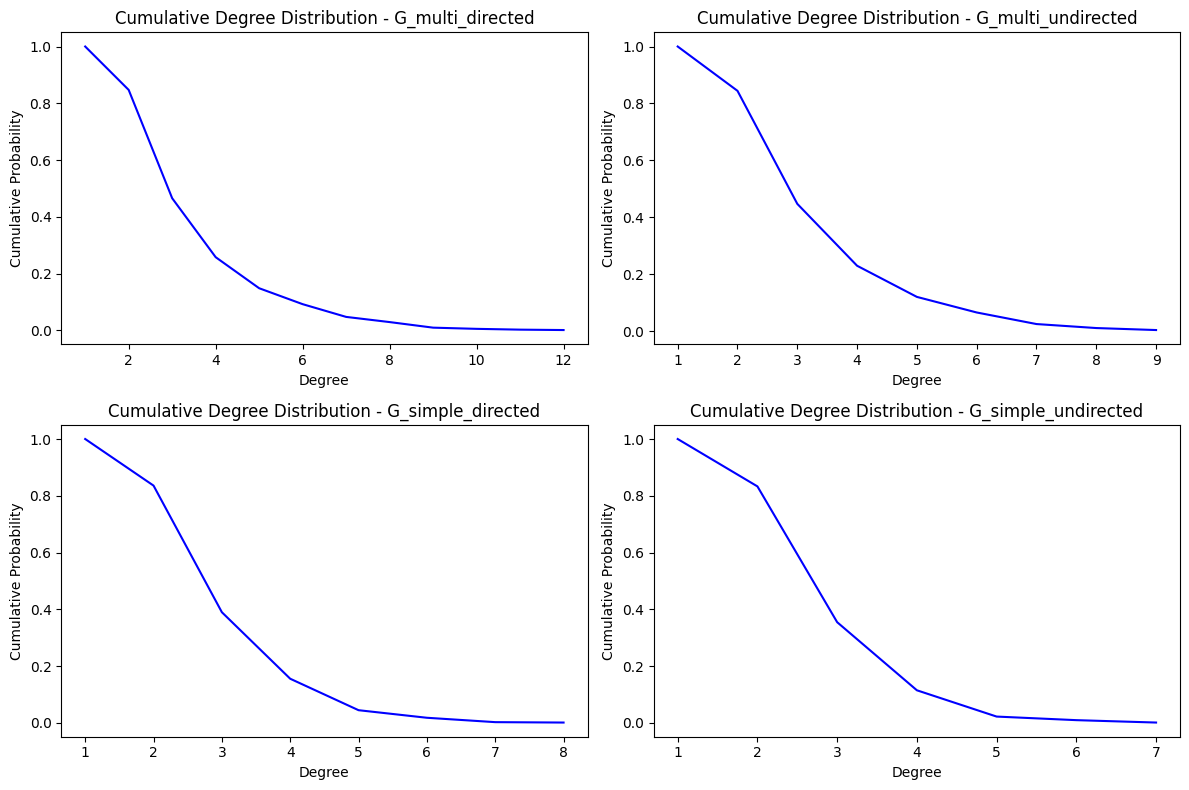

In [110]:
def plot_cumulative_degree_distribution(G, title):
    # Get the degree sequence
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    # Create a cumulative distribution in decreasing order
    degreeCount = np.unique(degree_sequence, return_counts=True)
    cdf = np.cumsum(degreeCount[1][::-1])[::-1] / len(degree_sequence)
    # Sort the degree and cdf arrays in descending order
    degreeCount = degreeCount[0][::-1]
    cdf = cdf[::-1]
    # Instead of plotting it, return the values so that one can plot many graphs in the same figure, but with different plots (i.e., axs)
    return degreeCount, cdf
                
# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the cumulative degree distribution of G_multi_directed
x, y = plot_cumulative_degree_distribution(G_multi_directed, 'Cumulative Degree Distribution - G_multi_directed')
axs[0, 0].plot(x, y, linestyle='-', color='b')
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Cumulative Probability')
axs[0, 0].set_title('Cumulative Degree Distribution - G_multi_directed')

# Plot the cumulative degree distribution of G_multi_undirected
x, y = plot_cumulative_degree_distribution(G_multi_undirected, 'Cumulative Degree Distribution - G_multi_undirected')
axs[0, 1].plot(x, y, linestyle='-', color='b')
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Cumulative Probability')
axs[0, 1].set_title('Cumulative Degree Distribution - G_multi_undirected')

# Plot the cumulative degree distribution of G_simple_directed
x, y = plot_cumulative_degree_distribution(G_simple_directed, 'Cumulative Degree Distribution - G_simple_directed')
axs[1, 0].plot(x, y, linestyle='-', color='b')
axs[1, 0].set_xlabel('Degree')
axs[1, 0].set_ylabel('Cumulative Probability')
axs[1, 0].set_title('Cumulative Degree Distribution - G_simple_directed')

# Plot the cumulative degree distribution of G_simple_undirected
x, y = plot_cumulative_degree_distribution(G_simple_undirected, 'Cumulative Degree Distribution - G_simple_undirected')
axs[1, 1].plot(x, y, linestyle='-', color='b')
axs[1, 1].set_xlabel('Degree')
axs[1, 1].set_ylabel('Cumulative Probability')
axs[1, 1].set_title('Cumulative Degree Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

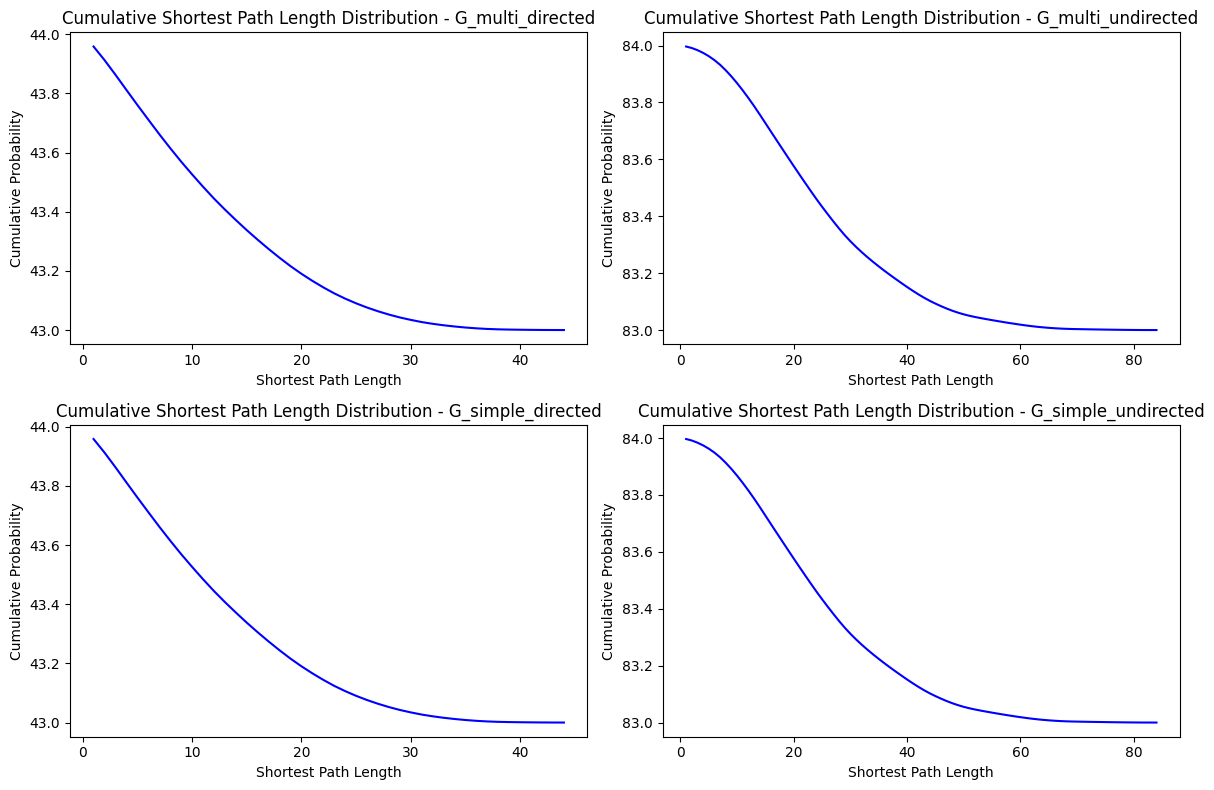

In [113]:
# Write a similar function to plot the cumulative shortest path length distribution
def plot_cumulative_shortest_path_length_distribution(G, title):
    # Compute all pairs shortest path lengths
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    # Flatten the dictionary to a list of lengths
    shortest_path_lengths = [length for lengths in shortest_path_lengths.values() for length in lengths.values()]
    # Create a cumulative distribution in decreasing order, i.e., 
    shortest_path_lengths = np.array(shortest_path_lengths)
    shortest_path_lengths = shortest_path_lengths[shortest_path_lengths > 0]
    shortest_path_lengths = np.sort(shortest_path_lengths)
    shortest_path_lengths = shortest_path_lengths[::-1]
    cdf = np.cumsum(np.unique(shortest_path_lengths, return_counts=True)[1]) / len(shortest_path_lengths)
    # Instead of plotting it, return the values so that one can plot many graphs in the same figure, but with different plots (i.e., axs)
    return np.unique(shortest_path_lengths), cdf


# Create a figure and axes for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the cumulative shortest path length distribution of G_multi_directed
x, y = plot_cumulative_shortest_path_length_distribution(G_multi_directed, 'Cumulative Shortest Path Length Distribution - G_multi_directed')
axs[0, 0].plot(x, len(x) - y, linestyle='-', color='b')
axs[0, 0].set_xlabel('Shortest Path Length')
axs[0, 0].set_ylabel('Cumulative Probability')
axs[0, 0].set_title('Cumulative Shortest Path Length Distribution - G_multi_directed')

# Plot the cumulative shortest path length distribution of G_multi_undirected
x, y = plot_cumulative_shortest_path_length_distribution(G_multi_undirected, 'Cumulative Shortest Path Length Distribution - G_multi_undirected')
axs[0, 1].plot(x, len(x) - y, linestyle='-', color='b')
axs[0, 1].set_xlabel('Shortest Path Length')
axs[0, 1].set_ylabel('Cumulative Probability')
axs[0, 1].set_title('Cumulative Shortest Path Length Distribution - G_multi_undirected')

# Plot the cumulative shortest path length distribution of G_simple_directed
x, y = plot_cumulative_shortest_path_length_distribution(G_simple_directed, 'Cumulative Shortest Path Length Distribution - G_simple_directed')
axs[1, 0].plot(x, len(x) - y, linestyle='-', color='b')
axs[1, 0].set_xlabel('Shortest Path Length')
axs[1, 0].set_ylabel('Cumulative Probability')
axs[1, 0].set_title('Cumulative Shortest Path Length Distribution - G_simple_directed')

# Plot the cumulative shortest path length distribution of G_simple_undirected
x, y = plot_cumulative_shortest_path_length_distribution(G_simple_undirected, 'Cumulative Shortest Path Length Distribution - G_simple_undirected')
axs[1, 1].plot(x, len(x) - y, linestyle='-', color='b')
axs[1, 1].set_xlabel('Shortest Path Length')
axs[1, 1].set_ylabel('Cumulative Probability')
axs[1, 1].set_title('Cumulative Shortest Path Length Distribution - G_simple_undirected')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()